In [1]:
import torch

In [2]:
from torch.utils.data import Dataset

In [3]:
class CustomDataset(Dataset):
    def __init__(self):
        self.x = [
            [10,20],
            [10,20],
            [10,20],
            [10,20],
            [10,20]
        ]
        self.y = [0,0,1,1,1]

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        input_data = self.x[index]
        label = self.y[index]
        return torch.tensor(input_data), torch.tensor(label)

In [4]:
custom_dataset = CustomDataset()

In [5]:
len(custom_dataset)

5

In [6]:
custom_dataset[0]

(tensor([10, 20]), tensor(0))

# CSV 데이터 활용

In [7]:
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset

In [8]:
abalone_df = pd.read_csv(
     'https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv',
    names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
           'Viscera weight', 'Shell weight', 'Age']
)

In [9]:
abalone_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [10]:
input_data = abalone_df.drop(columns=['Age']).to_numpy().astype(np.float32)
target_data = abalone_df['Age'].to_numpy().astype(np.float32)

In [11]:
input_data.shape

(3320, 7)

In [12]:
target_data.shape

(3320,)

In [13]:
class AbaloneDataset(Dataset):
    def __init__(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data

    def __len__(self):
        return (len(self.input_data))

    def __getitem__(self, index):
        input_tensor = torch.tensor(self.input_data[index])
        target_tensor = torch.tensor(self.target_data[index])
        return input_tensor, target_tensor

In [14]:
abalone_dataset = AbaloneDataset(input_data=input_data,
                                 target_data=target_data)

print(len(abalone_dataset))
print(abalone_dataset[4])

3320
(tensor([0.5450, 0.4200, 0.1300, 0.8790, 0.3740, 0.1695, 0.2300]), tensor(13.))


# 이미지 데이터 활용

In [15]:
import torch
import numpy as np
from PIL import Image
from torch.utils.data import Dataset
import glob

In [16]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xvf ./flower_photos.tgz > /dev/null 2>&1

--2025-09-09 00:02:15--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.207, 74.125.134.207, 142.250.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   139MB/s    in 1.6s    

2025-09-09 00:02:17 (139 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [17]:
image_paths = glob.glob('/content/flower_photos/*/*.jpg')

In [18]:
print(image_paths)

['/content/flower_photos/sunflowers/200557981_f800fa1af9.jpg', '/content/flower_photos/sunflowers/1715303025_e7065327e2.jpg', '/content/flower_photos/sunflowers/2678588376_6ca64a4a54_n.jpg', '/content/flower_photos/sunflowers/15973657966_d6f6005539_n.jpg', '/content/flower_photos/sunflowers/18972803569_1a0634f398_m.jpg', '/content/flower_photos/sunflowers/1788133737_b1133d1aa7.jpg', '/content/flower_photos/sunflowers/13096076565_72c2c60875_n.jpg', '/content/flower_photos/sunflowers/1240625276_fb3bd0c7b1.jpg', '/content/flower_photos/sunflowers/5738580862_e128192f75.jpg', '/content/flower_photos/sunflowers/3838274225_36010c6254_n.jpg', '/content/flower_photos/sunflowers/2759796022_55bd47bfa2_n.jpg', '/content/flower_photos/sunflowers/8705462313_4458d64cd4.jpg', '/content/flower_photos/sunflowers/9339697826_88c9c4dc50.jpg', '/content/flower_photos/sunflowers/4890268276_563f40a193.jpg', '/content/flower_photos/sunflowers/8021568040_f891223c44_n.jpg', '/content/flower_photos/sunflowers/404

In [19]:
print(len(image_paths))

3670


In [20]:
class FlowerDataset(Dataset):
    def __init__(self, image_paths):
        self.image_paths = image_paths

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path=self.image_paths[index]
        image = Image.open(image_path)                  # 이미지 불러오는?
        image_np = np.array(image)
        return torch.tensor(image_np)

In [21]:
dataset = FlowerDataset(image_paths=image_paths)

In [22]:
print(len(dataset))

3670


In [23]:
import matplotlib.pyplot as plt

def show_image(image_tensor):
    image = image_tensor.numpy()
    plt.figure()
    plt.imshow(image)
    plt.axis('off')

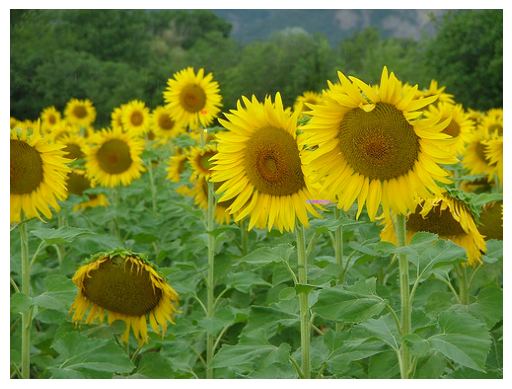

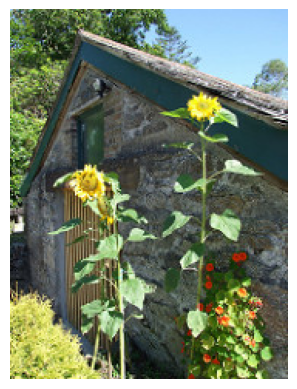

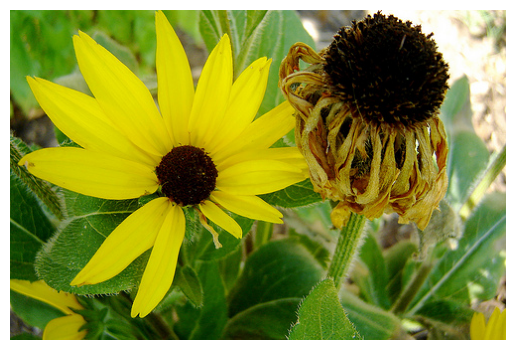

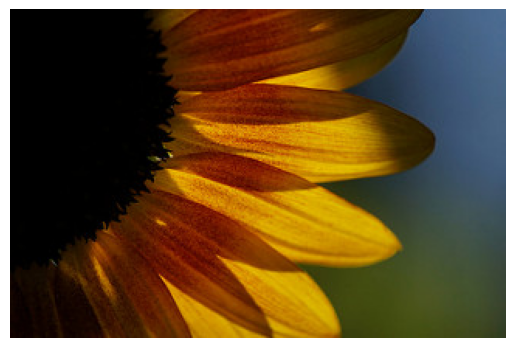

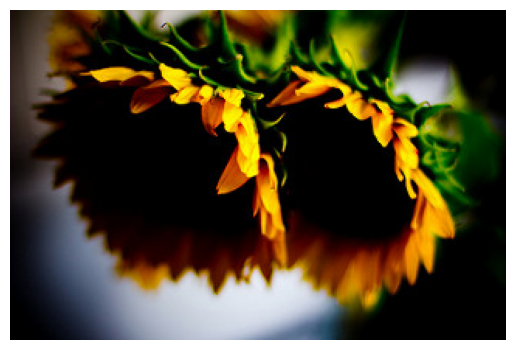

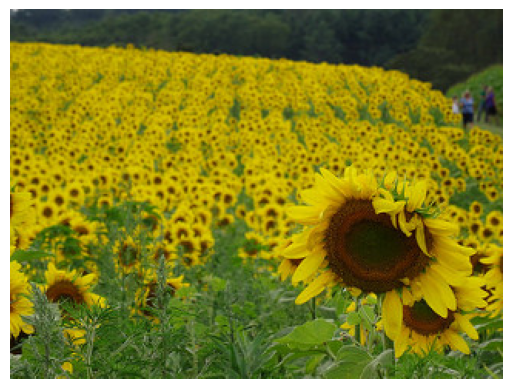

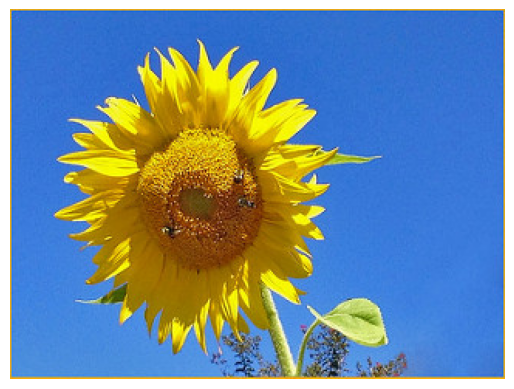

In [24]:
for i in range(33, 40):
    show_image(dataset[i])

# 실습

scikit-learn에서 California Housing 데이터셋을 불러온 뒤, 입력은 `input_data`에 저장하고 타깃은 `target_data`에 저장하세요.이때 `input_data`와 `target_data` 모두 데이터 타입은 float32로 지정해주세요.

California Housing 데이터셋의 입력과 타깃을 짝지어 관리하는 커스텀 Dataset 클래스 `CaliforniaHousingDataset`을 정의해 주세요.
   
코드 마지막 부분에서 0번 인덱스 데이터를 출력했을 때 다음과 같은 결과가 나와야 합니다.




```
(tensor([   8.3252,   41.0000,    6.9841,    1.0238,  322.0000,    2.5556,
          37.8800, -122.2300]), tensor(4.5260))
```

In [25]:
import numpy as np
from sklearn import datasets

import torch
from torch.utils.data import Dataset

cal_housing = datasets.fetch_california_housing()
input_data = cal_housing.data.astype(np.float32)
target_data = cal_housing.target.astype(np.float32)

In [26]:
class CalHousingDataset(Dataset):
    def __init__(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data

    def __len__(self):
        return len(self.input_data)

    def __getitem__(self, index):
        input_tensor = torch.tensor(self.input_data[index])
        target_tensor = torch.tensor(self.target_data[index])
        return input_tensor, target_tensor

In [27]:
dataset = CalHousingDataset(input_data=input_data,
                            target_data=target_data)
print(dataset[0])

(tensor([   8.3252,   41.0000,    6.9841,    1.0238,  322.0000,    2.5556,
          37.8800, -122.2300]), tensor(4.5260))


In [28]:
# 위와 같은 코드 대신 데이터를 밖에서 지정하는지 안에서 지정하는지 차이일뿐!!!!!

class CalHousingDataset(Dataset):
    def __init__(self):
        cal_housing = datasets.fetch_california_housing()
        self.input_data = cal_housing.data.astype(np.float32)
        self.target_data = cal_housing.target.astype(np.float32)

    def __len__(self):
        return len(self.input_data)

    def __getitem__(self, index):
        input_tensor = torch.tensor(self.input_data[index])
        target_tensor = torch.tensor(self.target_data[index])
        return input_tensor, target_tensor

In [29]:
dataset = CalHousingDataset()
print(dataset[0])

(tensor([   8.3252,   41.0000,    6.9841,    1.0238,  322.0000,    2.5556,
          37.8800, -122.2300]), tensor(4.5260))


# 데이터 분할

In [30]:
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset

In [31]:
abalone_df = pd.read_csv(
    'https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv',
    names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
           'Viscera weight', 'Shell weight', 'Age']
)

input_data = abalone_df.drop(columns=['Age']).to_numpy().astype(np.float32)
target_data = abalone_df['Age'].to_numpy().astype(np.float32)

In [32]:
class AbaloneDataset(Dataset):
    def __init__(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data

    def __len__(self):
        return len(self.input_data)

    def __getitem__(self, index):
        input_tensor = torch.tensor(self.input_data[index])
        target_tensor = torch.tensor(self.target_data[index])
        return input_tensor, target_tensor

In [33]:
# 데이터를 학습, 검증, 테스트 데이터로 나누기
train_size = int(len(input_data) * 0.8)
val_size = int(len(input_data) * 0.1)

In [34]:
train_size

2656

In [35]:
val_size

332

In [36]:
train_inputs = input_data[:train_size]
train_targets = target_data[:train_size]

val_inputs = input_data[train_size : train_size + val_size]
val_targets = target_data[train_size : train_size + val_size]

test_inputs = input_data[train_size + val_size:]
test_targets = target_data[train_size + val_size:]

In [37]:
train_dataset = AbaloneDataset(train_inputs, train_targets)
val_dataset = AbaloneDataset(val_inputs, val_targets)
test_dataset = AbaloneDataset(test_inputs, test_targets)

In [38]:
print(len(input_data))
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

3320
2656
332
332


In [39]:
from torch.utils.data import random_split
train, val, test = random_split(input_data,[train_size, val_size,
                                            (len(input_data)-train_size-val_size)])

print(len(train))
print(len(val))
print(len(test))

2656
332
332


# 표준화

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_inputs)

StandardScaler()

In [41]:
print(train_inputs.shape)

(2656, 7)


In [42]:
train_inputs_scaled = scaler.transform(train_inputs)
val_inputs_scaled = scaler.transform(val_inputs)
test_inputs_scaled = scaler.transform(test_inputs)

In [43]:
print(train_inputs[0])
print(train_inputs_scaled[0])
print('===========================================')
print(train_inputs_scaled.mean(axis=0))
print(train_inputs_scaled.std(axis=0))

[0.435  0.335  0.11   0.334  0.1355 0.0775 0.0965]
[-0.73832756 -0.7264121  -0.67939436 -1.0060642  -1.0061584  -0.9373445
 -1.0149276 ]
[ 7.1812827e-09 -1.5798822e-08  6.1040901e-09  5.0268976e-09
 -7.1812827e-09 -7.1812827e-09  4.3087693e-09]
[1. 1. 1. 1. 1. 1. 1.]


In [44]:
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import Dataset

# 데이터셋 클래스 정의
class AbaloneDataset(Dataset):
    def __init__(self, inputs, targets, scaler=None):
        """
        초기화 메서드
        :param inputs: 원본 입력 데이터 (numpy 배열)
        :param targets: 레이블 데이터 (numpy 배열)
        :param scaler: Scikit-learn의 StandardScaler 객체 (선택사항)
        """
        self.original_inputs = inputs  # 복원을 위해 원본 데이터 저장
        self.targets = targets
        self.scaler = scaler

        # 데이터 표준화 수행
        if self.scaler:
            self.inputs = self.scaler.transform(inputs)
        else:
            self.inputs = inputs

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, index):
        input_data = torch.tensor(self.inputs[index], dtype=torch.float32)
        target_data = torch.tensor(self.targets[index], dtype=torch.float32)
        return input_data, target_data

    def inverse_transform(self, scaled_data):
        """
        표준화된 데이터를 원래 값으로 복원
        :param scaled_data: 표준화된 데이터
        """
        if self.scaler:
            return self.scaler.inverse_transform(scaled_data)
        else:
            # 스케일러가 없는 경우 데이터를 그대로 반환
            return scaled_data

    def log_statistics(self):
        """
        현재 데이터의 평균 및 표준편차를 로그로 출력
        """
        print("Inputs Mean:", self.inputs.mean(axis=0))
        print("Inputs Std:", self.inputs.std(axis=0))

# 데이터 표준화
scaler = StandardScaler()
scaler.fit(train_inputs)

# 데이터셋 객체 생성
train_dataset = AbaloneDataset(train_inputs, train_targets, scaler=scaler)
val_dataset = AbaloneDataset(val_inputs, val_targets, scaler=scaler)
test_dataset = AbaloneDataset(test_inputs, test_targets, scaler=scaler)

# 데이터 통계 출력
print("Train Dataset Statistics:")
train_dataset.log_statistics()

# 데이터 복원 확인
train_data = train_dataset[0]
original_data = train_dataset.inverse_transform([train_data[0].numpy()])

# 결과 출력
print("복원된 데이터:", original_data)
print("원본 데이터:", train_inputs[0])


Train Dataset Statistics:
Inputs Mean: [ 7.1812827e-09 -1.5798822e-08  6.1040901e-09  5.0268976e-09
 -7.1812827e-09 -7.1812827e-09  4.3087693e-09]
Inputs Std: [1. 1. 1. 1. 1. 1. 1.]
복원된 데이터: [[0.435      0.33500001 0.11       0.33399999 0.13549999 0.0775
  0.09649999]]
원본 데이터: [0.435  0.335  0.11   0.334  0.1355 0.0775 0.0965]


# 데이터 로더

In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import Dataset

In [46]:
abalone_df = pd.read_csv(
    'https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv',
    names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
           'Viscera weight', 'Shell weight', 'Age']
)

input_data = abalone_df.drop(columns=['Age']).to_numpy().astype(np.float32)
target_data = abalone_df['Age'].to_numpy().astype(np.float32)

In [54]:
class AbaloneDataset(Dataset):
    def __init__(self, input_data, target_data):
        self.input_data=input_data
        self.target_data=target_data

    def __len__(self):
        return len(self.input_data)

    def __getitem__(self, index):
        input_tensor = torch.tensor(self.input_data[index])
        target_tensor = torch.tensor(self.target_data[index])
        return input_tensor, target_tensor

In [48]:
# 데이터를 학습, 검증, 테스트 데이터로 나누기
train_size = int(len(input_data) * 0.8)
val_size = int(len(input_data) * 0.1)

train_inputs, val_inputs, test_inputs = random_split(input_data, [train_size, val_size,
                                             (len(input_data)-train_size-val_size)])
train_targets, val_targets, test_targets = random_split(target_data, [train_size, val_size,
                                             (len(input_data)-train_size-val_size)])

In [55]:
scaler = StandardScaler()
scaler.fit(train_inputs)

StandardScaler()

In [56]:
train_inputs_scaled = scaler.transform(train_inputs)
val_inputs_scaled = scaler.transform(val_inputs)
test_inputs_scaled = scaler.transform(test_inputs)

train_dataset = AbaloneDataset(train_inputs_scaled, train_targets)
val_dataset = AbaloneDataset(val_inputs_scaled, val_targets)
test_dataset = AbaloneDataset(test_inputs_scaled, test_targets)

In [60]:
# 데이터 로더 만들기
from torch.utils.data import DataLoader

traint_dataloader = DataLoader(train_dataset, batch_size=8, shuffle= True)

In [63]:
for train_batch in traint_dataloader:
    print(f"input batch : {train_batch[0]}")
    print(f"traget batch : {train_batch[1]}")
    print(train_batch[0].size())
    break

input batch : tensor([[ 1.0890,  0.9806,  1.2951,  1.0651,  1.0594,  0.8554,  1.3217],
        [ 1.0890,  1.0307,  0.9125,  1.2009,  1.0369,  1.7494,  0.8885],
        [-1.0634, -1.1217, -1.0004, -1.1347, -1.0123, -1.3521, -1.0929],
        [-1.1462, -1.0216, -1.2554, -1.1225, -1.1251, -1.1788, -0.9863],
        [ 1.0062,  0.7804,  0.2749,  0.8057,  0.9512,  0.8463,  0.6471],
        [-2.5950, -2.5734, -2.4031, -1.6076, -1.5556, -1.5756, -1.6220],
        [ 0.5509,  0.5301,  0.4024,  0.1613, -0.1421, -0.2940,  0.6826],
        [ 0.4681,  0.3800, -0.3627, -0.2401, -0.2504, -0.3669, -0.0276]],
       dtype=torch.float64)
traget batch : tensor([ 6.,  7., 10., 10., 10.,  8.,  8., 11.])
torch.Size([8, 7])


In [65]:
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False)

In [66]:
for val_batch in val_dataloader:
    print(f"input batch : {val_batch[0]}")
    print(f"traget batch : {val_batch[1]}")
    print(val_batch[0].size())
    break

input batch : tensor([[ 0.0542,  0.2298, -0.2352, -0.2503, -0.0565, -0.3578, -0.3543],
        [ 0.4681,  0.5802,  0.5299,  0.4237, -0.1963,  0.7231,  0.8850],
        [ 1.4202,  1.7315,  1.5501,  2.1905,  1.4269,  2.7117,  2.0638],
        [ 1.2960,  1.5313,  1.4226,  1.7095,  0.9986,  1.8680,  2.1739]],
       dtype=torch.float64)
traget batch : tensor([12., 12.,  9., 10.])
torch.Size([4, 7])


In [67]:
# drop_last
len(val_dataset)

332

In [71]:
val_dataloader = DataLoader(val_dataset, batch_size=300, shuffle=True, drop_last=True)            # drop_last=true 는 남은 데이터를 학습하지 않고 버리는 형태 버려지는 데이터는 학습못할 우려가 있다면 셔플사용
for val_batch in val_dataloader:
    print(f"input batch : {val_batch[0]}")
    print(f"target batch : {val_batch[1]}")

input batch : tensor([[-1.8913, -1.8225, -1.5105,  ..., -1.3978, -1.3567, -1.4125],
        [ 0.7579,  0.6302,  0.9125,  ...,  0.6987,  1.4803,  0.5760],
        [-0.1114, -0.3709,  1.8052,  ...,  0.6739,  1.0150,  0.7394],
        ...,
        [ 1.2546,  1.3811,  1.4226,  ...,  1.4697,  1.7220,  2.6000],
        [-1.2290, -1.2719, -1.3829,  ..., -0.7734, -1.2290, -1.2207],
        [ 0.7165,  0.8305,  0.7850,  ...,  0.9332,  0.5270,  0.3985]],
       dtype=torch.float64)
target batch : tensor([ 7.,  7.,  9.,  4., 10.,  8., 11.,  6., 12., 10., 19., 10., 11.,  6.,
        12.,  6.,  4., 10., 16., 12.,  8., 10.,  9.,  8., 13., 11.,  9.,  8.,
         4., 13., 14., 20., 10.,  9.,  9., 12., 20., 10.,  6., 11., 11., 11.,
        18., 14., 11.,  9.,  8.,  8.,  8., 10.,  7.,  9., 19., 10., 13.,  9.,
        11.,  7., 10.,  7.,  8., 10., 11.,  5.,  9.,  7.,  9., 12.,  9., 10.,
         8., 11.,  8., 10., 10.,  6., 10.,  7.,  9.,  8.,  9.,  7., 18., 11.,
        12., 14., 11.,  5., 10., 10.,  9.